In [1]:
from swap_strategy import create_qaoa_swap_circuit, SATMapper
from utils import load_graph_from_npy
from graph_to_ansatz import GraphAnsatzConverter

from qiskit.transpiler.passes.routing.commuting_2q_gate_routing import SwapStrategy

In [2]:
g = load_graph_from_npy("graphs/adj_matrix_1.npy")
swap_strategy = SwapStrategy.from_line(range(len(g.nodes())))
sm = SATMapper(timeout=10)
remapped_graph, edge_map, min_swap_layers = sm.remap_graph_with_sat(
    graph=g, swap_strategy=swap_strategy, max_layers=1
)
print("Map from old to new nodes: ", edge_map)
print("Min SWAP layers:", min_swap_layers)
converter = GraphAnsatzConverter(g if remapped_graph is None else remapped_graph)
qaoa_circ = create_qaoa_swap_circuit(
    converter.hamiltonian, swap_strategy, qaoa_layers=1
)
# qaoa_circ.decompose(reps=1).draw(output="mpl")
len(qaoa_circ.decompose(reps=1).get_instructions("swap"))

Layers: 0, Status: False, Time: 0.00019200000000019202
Map from old to new nodes:  None
Min SWAP layers: None


10

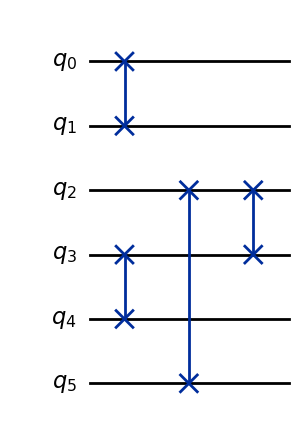

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(6)
swap_list = [(0, 1), (3, 4), (2, 5), (2, 3)]
for swap in swap_list:
    qc.swap(*swap)
depth = qc.depth(lambda instr: instr.name == "swap")
qc.draw(output="mpl")